In [12]:
import json
import os
from distutils.dir_util import copy_tree
import shutil
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
print('TensorFlow version: ', tf.__version__)

# Set to force CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#if tf.test.gpu_device_name():
#    print('GPU found')
#else:
#    print("No GPU found")

dataset_path = '/kaggle/input/split-dataset/split_dataset'

def get_filename_only(file_path):
    file_basename = os.path.basename(file_path)
    filename_only = file_basename.split('.')[0]
    return filename_only


from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

def genDataset(l, w):
    input_size_height = l
    input_size_width = w
    batch_size_num = 8
    train_path = os.path.join(dataset_path, 'train')
    val_path = os.path.join(dataset_path, 'val')
    test_path = os.path.join(dataset_path, 'test')

    train_datagen = ImageDataGenerator(
        rescale = 1/255,    #rescale the tensor values to [0,1]
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.2,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest'
    )

    train_generator = train_datagen.flow_from_directory(
        directory = train_path,
        target_size = (input_size_height, input_size_width),
        color_mode = "rgb",
        class_mode = "binary",  #"categorical", "binary", "sparse", "input"
        batch_size = batch_size_num,
        shuffle = True
        #save_to_dir = tmp_debug_path
    )

    val_datagen = ImageDataGenerator(
        rescale = 1/255    #rescale the tensor values to [0,1]
    )

    val_generator = val_datagen.flow_from_directory(
        directory = val_path,
        target_size = (input_size_height, input_size_width),
        color_mode = "rgb",
        class_mode = "binary",  #"categorical", "binary", "sparse", "input"
        batch_size = batch_size_num,
        shuffle = True
        #save_to_dir = tmp_debug_path
    )

    test_datagen = ImageDataGenerator(
        rescale = 1/255    #rescale the tensor values to [0,1]
    )

    test_generator = test_datagen.flow_from_directory(
        directory = test_path,
        classes=['real', 'fake'],
        target_size = (input_size_height, input_size_width),
        color_mode = "rgb",
        class_mode = None,
        batch_size = 1,
        shuffle = False
    )
    return train_generator, val_generator, test_generator

TensorFlow version:  2.12.0


In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# MODEL A

In [14]:
def ModelA(l, w, train_generator, val_generator, test_generator):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(l, w, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.8))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.6))

    # Flatten Layer
    model.add(Flatten())

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Print the model summary
    model.summary()

    custom_callbacks = [
        EarlyStopping(
            monitor = 'val_loss',
            mode = 'min',
            patience = 5,
            verbose = 1
        )
    ]

    # Train network
    num_epochs = 60
    history = model.fit_generator(
        train_generator,
        epochs = num_epochs,
        steps_per_epoch = len(train_generator),
        validation_data = val_generator,
        validation_steps = len(val_generator),
        callbacks = custom_callbacks
    )
    
    plot_history(history)
    

# MODEL B

In [15]:
def ModelB(l, w, train_generator, val_generator, test_generator):
    # Create a Sequential model
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (11, 11), strides=(1, 1), activation='relu', input_shape=(l, w, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.8))

    # Second Convolutional Layer
    model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.6))

    # Flatten Layer
    model.add(Flatten())

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Print the model summary
    model.summary()

    custom_callbacks = [
        EarlyStopping(
            monitor = 'val_loss',
            mode = 'min',
            patience = 5,
            verbose = 1
        )
    ]

    # Train network
    num_epochs = 60
    history = model.fit_generator(
        train_generator,
        epochs = num_epochs,
        steps_per_epoch = len(train_generator),
        validation_data = val_generator,
        validation_steps = len(val_generator),
        callbacks = custom_callbacks
    )
    plot_history(history)

# MODEL - C

In [16]:
def ModelC(l, w, train_generator, val_generator, test_generator):
    # Create a Sequential model
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(l, w, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Flatten Layer
    model.add(Flatten())

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Print the model summary
    model.summary()

    custom_callbacks = [
        EarlyStopping(
            monitor = 'val_loss',
            mode = 'min',
            patience = 5,
            verbose = 1
        )
    ]

    # Train network
    num_epochs = 60
    history = model.fit_generator(
        train_generator,
        epochs = num_epochs,
        steps_per_epoch = len(train_generator),
        validation_data = val_generator,
        validation_steps = len(val_generator),
        callbacks = custom_callbacks
    )
    plot_history(history)

# 224 x 224

Found 1354 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496    

/tmp/ipykernel_28/3176332396.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 13:53:03.731228: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 111s 588ms/step - loss: 10.7316 - accuracy: 0.5332 - val_loss: 1.4497 - val_accuracy: 0.6310
Epoch 2/60
170/170 [==============================] - 82s 483ms/step - loss: 11.0324 - accuracy: 0.5628 - val_loss: 2.3674 - val_accuracy: 0.6071
Epoch 3/60
170/170 [==============================] - 78s 460ms/step - loss: 9.8474 - accuracy: 0.5406 - val_loss: 15.2746 - val_accuracy: 0.5833
Epoch 4/60
170/170 [==============================] - 78s 459ms/step - loss: 9.4125 - accuracy: 0.5687 - val_loss: 4.5090 - val_accuracy: 0.5060
Epoch 5/60
170/170 [==============================] - 78s 457ms/step - loss: 8.3364 - accuracy: 0.5650 - val_loss: 8.7057 - val_accuracy: 0.5655
Epoch 6/60
170/170 [==============================] - 81s 475ms/step - loss: 6.9275 - accuracy: 0.5805 - val_loss: 4.7366 - val_accuracy: 0.5714
Epoch 6: early stopping


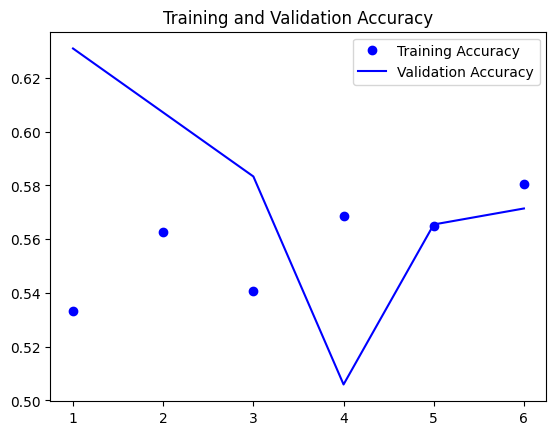

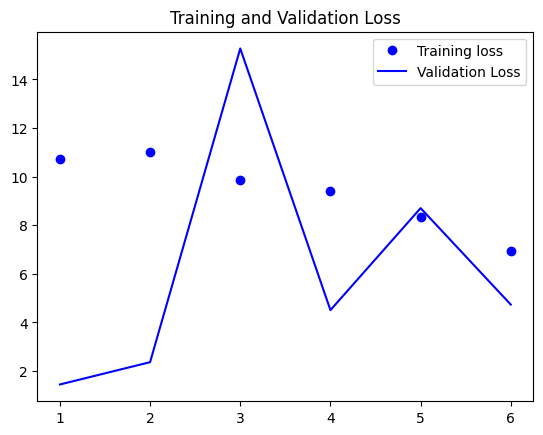

In [17]:
l = 224
w = 224

train_generator, val_generator, test_generator = genDataset(l, w)
ModelA(l, w, train_generator, val_generator, test_generator)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 214, 214, 32)      11648     
                                                                 
 batch_normalization_2 (Batc  (None, 214, 214, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 107, 107, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 107, 107, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 103, 103, 64)      51264     
                                                                 
 batch_normalization_3 (Batc  (None, 103, 103, 64)    

/tmp/ipykernel_28/1077515200.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 14:03:08.521901: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 87s 493ms/step - loss: 14.1871 - accuracy: 0.5414 - val_loss: 4.6912 - val_accuracy: 0.6250
Epoch 2/60
170/170 [==============================] - 80s 471ms/step - loss: 9.1112 - accuracy: 0.5517 - val_loss: 3.4616 - val_accuracy: 0.6190
Epoch 3/60
170/170 [==============================] - 79s 465ms/step - loss: 10.0814 - accuracy: 0.5421 - val_loss: 8.5517 - val_accuracy: 0.5060
Epoch 4/60
170/170 [==============================] - 79s 465ms/step - loss: 8.2307 - accuracy: 0.5731 - val_loss: 8.6526 - val_accuracy: 0.5298
Epoch 5/60
170/170 [==============================] - 80s 472ms/step - loss: 9.2527 - accuracy: 0.5569 - val_loss: 9.5627 - val_accuracy: 0.4226
Epoch 6/60
170/170 [==============================] - 79s 466ms/step - loss: 6.9101 - accuracy: 0.5480 - val_loss: 5.7018 - val_accuracy: 0.5357
Epoch 7/60
170/170 [==============================] - 80s 468ms/step - loss: 6.4399 - accuracy: 0.5827 - val_loss: 3.8938 - val_accuracy: 0

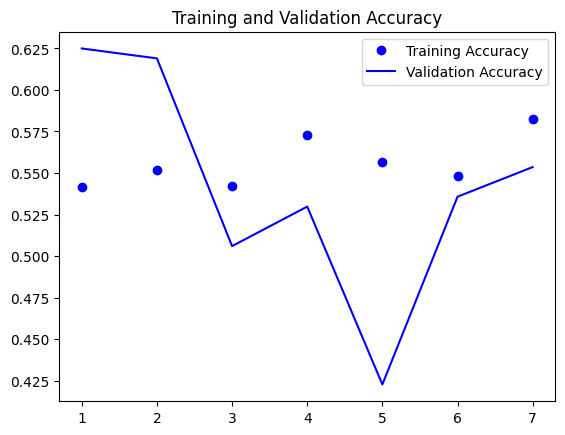

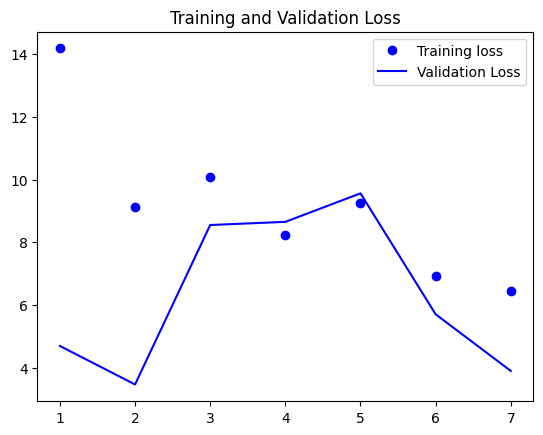

In [18]:
ModelB(l, w, train_generator, val_generator, test_generator)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 64)    

/tmp/ipykernel_28/4025117941.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 14:12:35.064204: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 82s 467ms/step - loss: 5.4937 - accuracy: 0.5428 - val_loss: 3.4747 - val_accuracy: 0.5179
Epoch 2/60
170/170 [==============================] - 80s 470ms/step - loss: 6.0491 - accuracy: 0.5391 - val_loss: 1.8277 - val_accuracy: 0.5833
Epoch 3/60
170/170 [==============================] - 78s 462ms/step - loss: 5.3188 - accuracy: 0.5635 - val_loss: 3.3515 - val_accuracy: 0.4940
Epoch 4/60
170/170 [==============================] - 78s 462ms/step - loss: 5.3193 - accuracy: 0.5694 - val_loss: 4.5498 - val_accuracy: 0.6250
Epoch 5/60
170/170 [==============================] - 79s 465ms/step - loss: 4.5995 - accuracy: 0.5820 - val_loss: 2.8417 - val_accuracy: 0.6131
Epoch 6/60
170/170 [==============================] - 78s 456ms/step - loss: 5.1321 - accuracy: 0.5997 - val_loss: 2.8362 - val_accuracy: 0.6429
Epoch 7/60
170/170 [==============================] - 80s 473ms/step - loss: 3.7491 - accuracy: 0.5879 - val_loss: 1.6261 - val_accuracy: 0.6

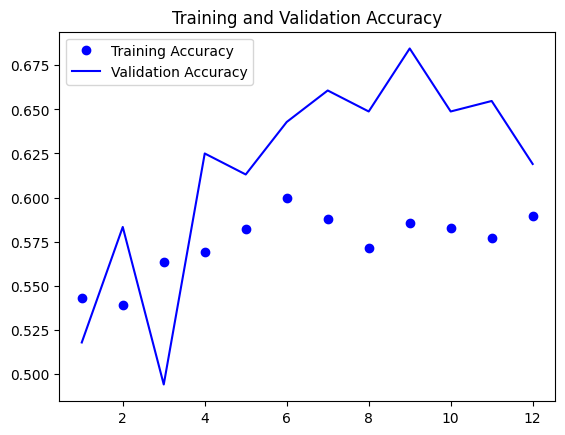

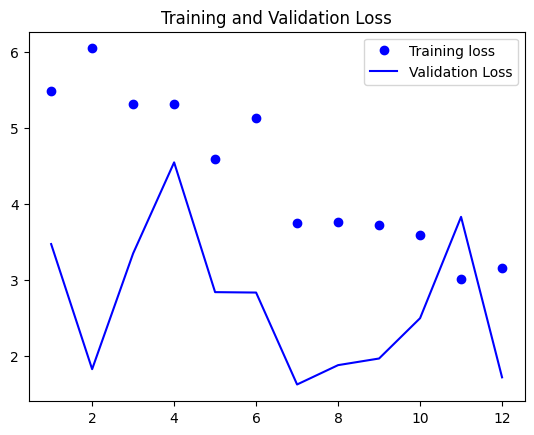

In [19]:
ModelC(l, w, train_generator, val_generator, test_generator)

# 299 x 299

Found 1354 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 295, 295, 32)      2432      
                                                                 
 batch_normalization_7 (Batc  (None, 295, 295, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 147, 147, 32)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 147, 147, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 145, 145, 64)      18496  

/tmp/ipykernel_28/3176332396.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 14:28:38.136708: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 88s 505ms/step - loss: 17.1069 - accuracy: 0.5325 - val_loss: 12.9708 - val_accuracy: 0.5000
Epoch 2/60
170/170 [==============================] - 84s 496ms/step - loss: 17.4855 - accuracy: 0.5569 - val_loss: 9.7682 - val_accuracy: 0.5714
Epoch 3/60
170/170 [==============================] - 86s 507ms/step - loss: 15.6637 - accuracy: 0.5628 - val_loss: 9.2904 - val_accuracy: 0.5774
Epoch 4/60
170/170 [==============================] - 86s 504ms/step - loss: 13.6205 - accuracy: 0.5835 - val_loss: 6.5015 - val_accuracy: 0.5893
Epoch 5/60
170/170 [==============================] - 86s 503ms/step - loss: 11.9430 - accuracy: 0.5613 - val_loss: 5.2654 - val_accuracy: 0.6607
Epoch 6/60
170/170 [==============================] - 87s 509ms/step - loss: 10.3014 - accuracy: 0.5547 - val_loss: 5.7872 - val_accuracy: 0.5714
Epoch 7/60
170/170 [==============================] - 86s 509ms/step - loss: 8.8833 - accuracy: 0.5812 - val_loss: 2.5081 - val_accura

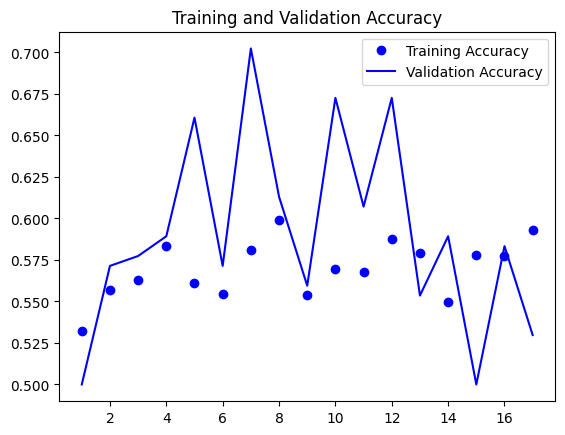

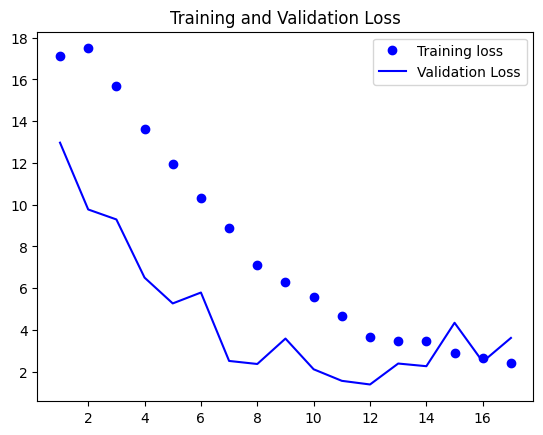

In [20]:
l = 299
w = 299

train_generator, val_generator, test_generator = genDataset(l, w)
ModelA(l, w, train_generator, val_generator, test_generator)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 289, 289, 32)      11648     
                                                                 
 batch_normalization_9 (Batc  (None, 289, 289, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 144, 144, 32)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 144, 144, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 140, 140, 64)      51264     
                                                                 
 batch_normalization_10 (Bat  (None, 140, 140, 64)    

/tmp/ipykernel_28/1077515200.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 14:56:41.867788: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 91s 516ms/step - loss: 17.7212 - accuracy: 0.5613 - val_loss: 15.9012 - val_accuracy: 0.6071
Epoch 2/60
170/170 [==============================] - 87s 513ms/step - loss: 16.3386 - accuracy: 0.5628 - val_loss: 23.6904 - val_accuracy: 0.4940
Epoch 3/60
170/170 [==============================] - 86s 508ms/step - loss: 17.6404 - accuracy: 0.5480 - val_loss: 10.2093 - val_accuracy: 0.4940
Epoch 4/60
170/170 [==============================] - 91s 533ms/step - loss: 10.9099 - accuracy: 0.5820 - val_loss: 12.1746 - val_accuracy: 0.4821
Epoch 5/60
170/170 [==============================] - 87s 513ms/step - loss: 10.7658 - accuracy: 0.5443 - val_loss: 10.1344 - val_accuracy: 0.5298
Epoch 6/60
170/170 [==============================] - 87s 509ms/step - loss: 8.1023 - accuracy: 0.5739 - val_loss: 4.0726 - val_accuracy: 0.6131
Epoch 7/60
170/170 [==============================] - 86s 508ms/step - loss: 6.8720 - accuracy: 0.5871 - val_loss: 4.3683 - val_acc

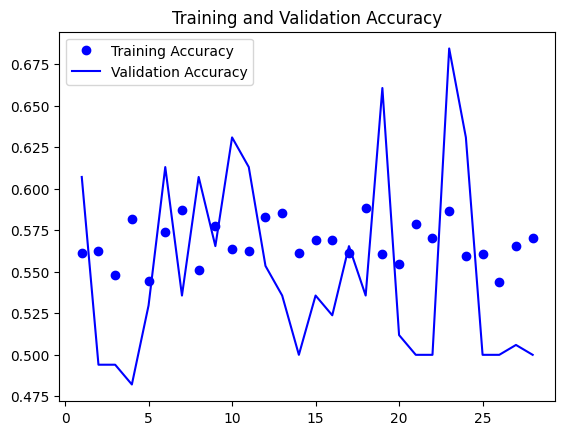

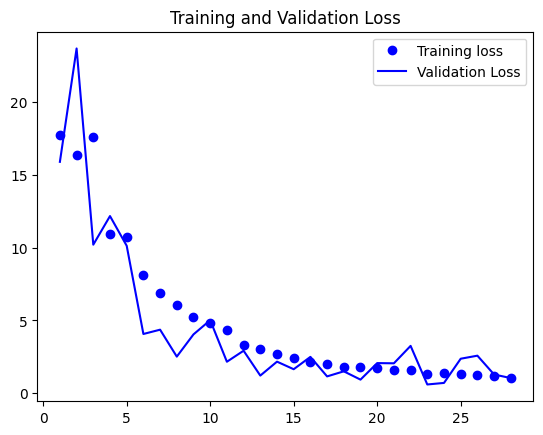

In [21]:
ModelB(l, w, train_generator, val_generator, test_generator)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 batch_normalization_11 (Bat  (None, 297, 297, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 batch_normalization_12 (Bat  (None, 146, 146, 64)    

/tmp/ipykernel_28/4025117941.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 15:45:20.152077: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_11/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 89s 501ms/step - loss: 9.0707 - accuracy: 0.5635 - val_loss: 14.0646 - val_accuracy: 0.5000
Epoch 2/60
170/170 [==============================] - 84s 496ms/step - loss: 10.4490 - accuracy: 0.5539 - val_loss: 6.7399 - val_accuracy: 0.5714
Epoch 3/60
170/170 [==============================] - 86s 504ms/step - loss: 8.4196 - accuracy: 0.5805 - val_loss: 7.7913 - val_accuracy: 0.5119
Epoch 4/60
170/170 [==============================] - 86s 507ms/step - loss: 7.4498 - accuracy: 0.5812 - val_loss: 5.0799 - val_accuracy: 0.6131
Epoch 5/60
170/170 [==============================] - 85s 501ms/step - loss: 8.1879 - accuracy: 0.5657 - val_loss: 4.5238 - val_accuracy: 0.5893
Epoch 6/60
170/170 [==============================] - 85s 496ms/step - loss: 7.2660 - accuracy: 0.5842 - val_loss: 3.7052 - val_accuracy: 0.6429
Epoch 7/60
170/170 [==============================] - 85s 501ms/step - loss: 6.2008 - accuracy: 0.5628 - val_loss: 2.5855 - val_accuracy: 0

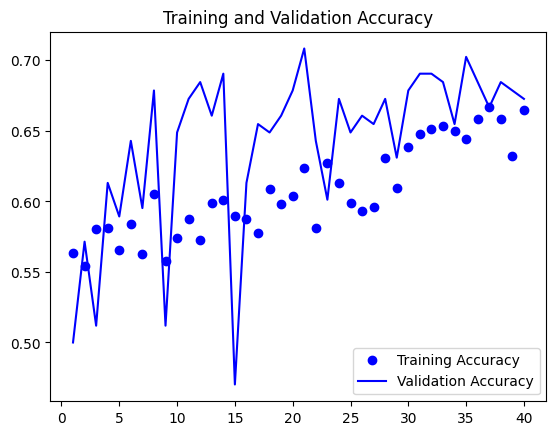

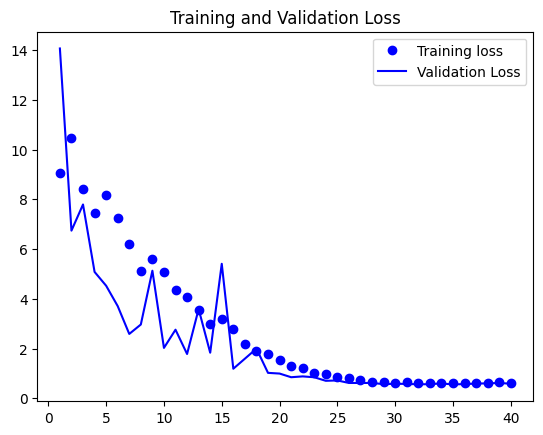

In [22]:
ModelC(l, w, train_generator, val_generator, test_generator)

# 135 x 240

Found 1354 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 131, 236, 32)      2432      
                                                                 
 batch_normalization_14 (Bat  (None, 131, 236, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 65, 118, 32)      0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 65, 118, 32)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 63, 116, 64)       18496  

/tmp/ipykernel_28/3176332396.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 16:53:28.022418: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 73s 419ms/step - loss: 6.3511 - accuracy: 0.5325 - val_loss: 2.9403 - val_accuracy: 0.5357
Epoch 2/60
170/170 [==============================] - 70s 411ms/step - loss: 6.5806 - accuracy: 0.5480 - val_loss: 4.1384 - val_accuracy: 0.5000
Epoch 3/60
170/170 [==============================] - 70s 411ms/step - loss: 6.5565 - accuracy: 0.5517 - val_loss: 1.8853 - val_accuracy: 0.6012
Epoch 4/60
170/170 [==============================] - 70s 410ms/step - loss: 6.5551 - accuracy: 0.5524 - val_loss: 4.7015 - val_accuracy: 0.5833
Epoch 5/60
170/170 [==============================] - 70s 414ms/step - loss: 6.0998 - accuracy: 0.5547 - val_loss: 4.6781 - val_accuracy: 0.4643
Epoch 6/60
170/170 [==============================] - 70s 412ms/step - loss: 5.5638 - accuracy: 0.5399 - val_loss: 3.0666 - val_accuracy: 0.6071
Epoch 7/60
170/170 [==============================] - 70s 412ms/step - loss: 5.0606 - accuracy: 0.5487 - val_loss: 1.2613 - val_accuracy: 0.6

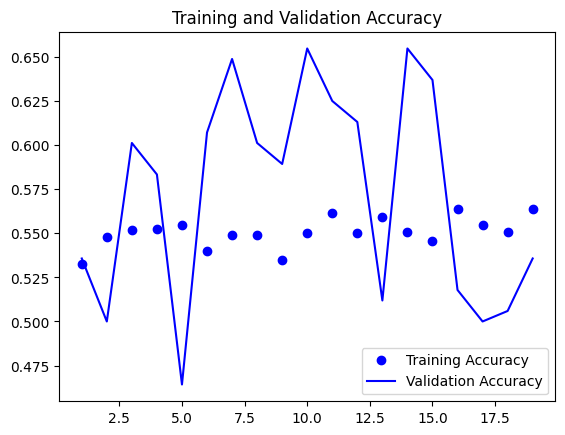

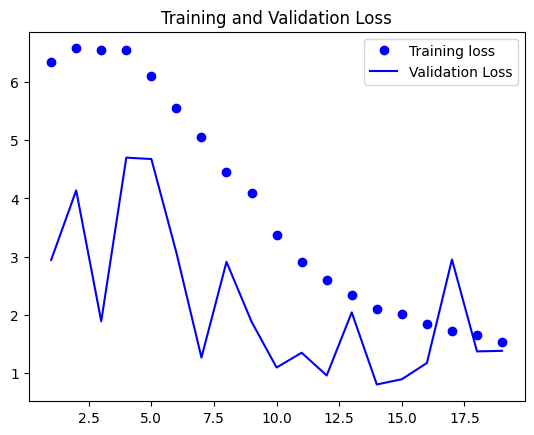

In [23]:
l = 135
w = 240

train_generator, val_generator, test_generator = genDataset(l, w)
ModelA(l, w, train_generator, val_generator, test_generator)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 125, 230, 32)      11648     
                                                                 
 batch_normalization_16 (Bat  (None, 125, 230, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 115, 32)      0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 62, 115, 32)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 58, 111, 64)       51264     
                                                                 
 batch_normalization_17 (Bat  (None, 58, 111, 64)     

/tmp/ipykernel_28/1077515200.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 17:16:37.730803: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 73s 416ms/step - loss: 6.9614 - accuracy: 0.5295 - val_loss: 2.8277 - val_accuracy: 0.5476
Epoch 2/60
170/170 [==============================] - 72s 421ms/step - loss: 6.6746 - accuracy: 0.5465 - val_loss: 5.9613 - val_accuracy: 0.5774
Epoch 3/60
170/170 [==============================] - 71s 416ms/step - loss: 6.5708 - accuracy: 0.5377 - val_loss: 5.4259 - val_accuracy: 0.6250
Epoch 4/60
170/170 [==============================] - 71s 418ms/step - loss: 5.8255 - accuracy: 0.5532 - val_loss: 3.1841 - val_accuracy: 0.5357
Epoch 5/60
170/170 [==============================] - 71s 415ms/step - loss: 5.3446 - accuracy: 0.5384 - val_loss: 5.6218 - val_accuracy: 0.5774
Epoch 6/60
170/170 [==============================] - 73s 428ms/step - loss: 4.3627 - accuracy: 0.5421 - val_loss: 2.9680 - val_accuracy: 0.6250
Epoch 6: early stopping


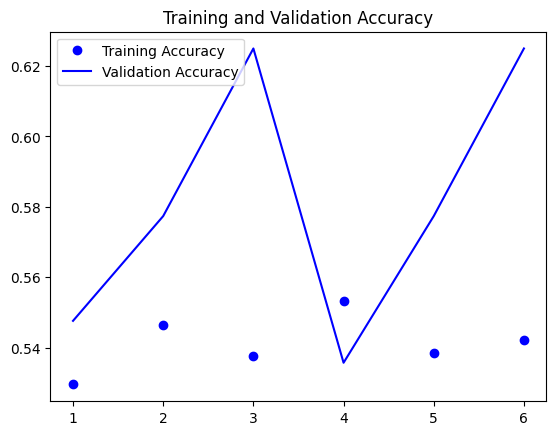

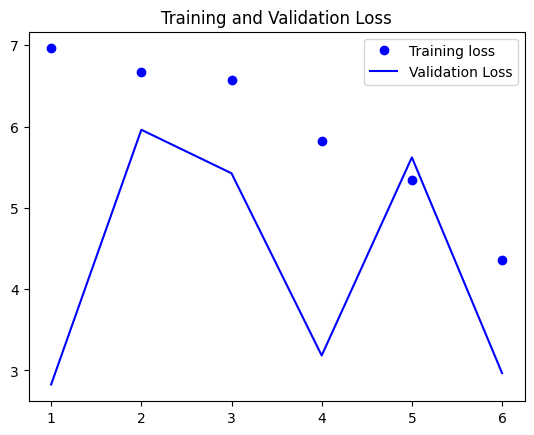

In [24]:
ModelB(l, w, train_generator, val_generator, test_generator)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 133, 238, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 133, 238, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 66, 119, 32)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 66, 119, 32)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 117, 64)       18496     
                                                                 
 batch_normalization_19 (Bat  (None, 64, 117, 64)     

/tmp/ipykernel_28/4025117941.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 17:24:40.039485: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 76s 430ms/step - loss: 3.8043 - accuracy: 0.5384 - val_loss: 1.0160 - val_accuracy: 0.5060
Epoch 2/60
170/170 [==============================] - 73s 428ms/step - loss: 4.2918 - accuracy: 0.5355 - val_loss: 2.2409 - val_accuracy: 0.5357
Epoch 3/60
170/170 [==============================] - 72s 424ms/step - loss: 4.3030 - accuracy: 0.5310 - val_loss: 1.3821 - val_accuracy: 0.5833
Epoch 4/60
170/170 [==============================] - 71s 419ms/step - loss: 3.3177 - accuracy: 0.5790 - val_loss: 1.2790 - val_accuracy: 0.6131
Epoch 5/60
170/170 [==============================] - 73s 427ms/step - loss: 3.7367 - accuracy: 0.5495 - val_loss: 1.6469 - val_accuracy: 0.6369
Epoch 6/60
170/170 [==============================] - 72s 421ms/step - loss: 3.5873 - accuracy: 0.5716 - val_loss: 2.0534 - val_accuracy: 0.6488
Epoch 6: early stopping


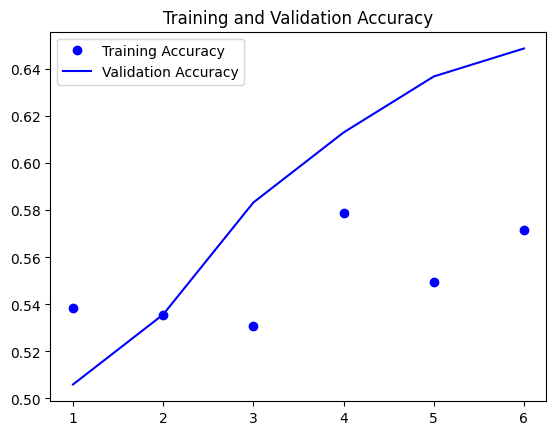

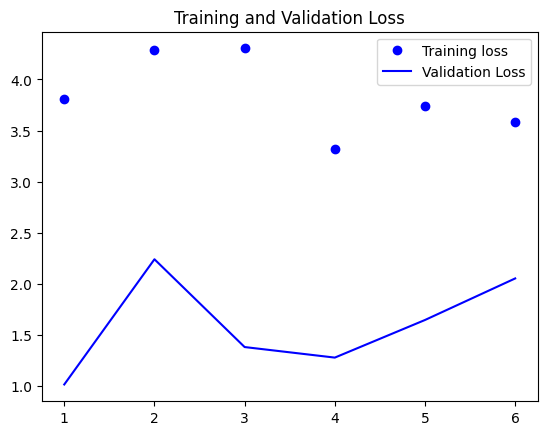

In [25]:
ModelC(l, w, train_generator, val_generator, test_generator)

# 270 x 480

Found 1354 images belonging to 2 classes.
Found 168 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 266, 476, 32)      2432      
                                                                 
 batch_normalization_21 (Bat  (None, 266, 476, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 133, 238, 32)     0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 133, 238, 32)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 131, 236, 64)      18496  

/tmp/ipykernel_28/3176332396.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 17:37:35.266673: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/dropout_21/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 102s 582ms/step - loss: 21.6480 - accuracy: 0.5222 - val_loss: 19.7822 - val_accuracy: 0.5000
Epoch 2/60
170/170 [==============================] - 97s 571ms/step - loss: 24.0646 - accuracy: 0.5679 - val_loss: 7.8880 - val_accuracy: 0.5655
Epoch 3/60
170/170 [==============================] - 98s 574ms/step - loss: 17.6208 - accuracy: 0.5650 - val_loss: 14.6581 - val_accuracy: 0.5952
Epoch 4/60
170/170 [==============================] - 101s 593ms/step - loss: 20.5492 - accuracy: 0.5332 - val_loss: 9.1001 - val_accuracy: 0.6429
Epoch 5/60
170/170 [==============================] - 98s 574ms/step - loss: 15.3553 - accuracy: 0.5672 - val_loss: 6.9832 - val_accuracy: 0.5417
Epoch 6/60
170/170 [==============================] - 97s 572ms/step - loss: 13.6316 - accuracy: 0.5643 - val_loss: 11.5039 - val_accuracy: 0.6369
Epoch 7/60
170/170 [==============================] - 96s 566ms/step - loss: 11.2571 - accuracy: 0.5702 - val_loss: 12.0237 - val_

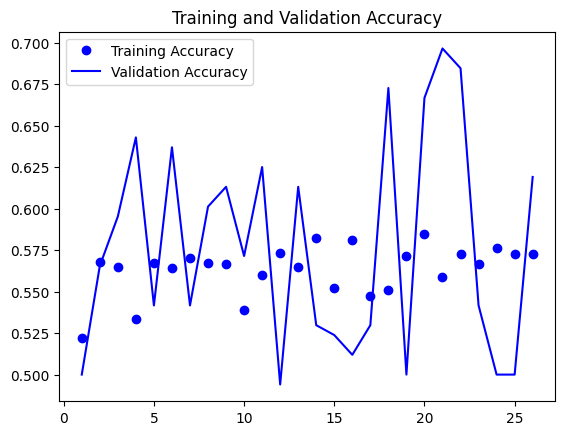

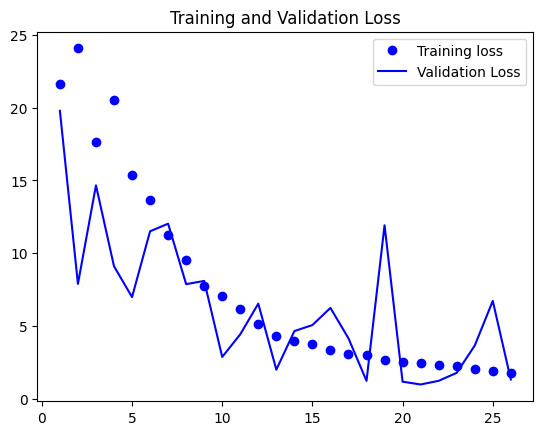

In [26]:
l = 270
w = 480

train_generator, val_generator, test_generator = genDataset(l, w)
ModelA(l, w, train_generator, val_generator, test_generator)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 260, 470, 32)      11648     
                                                                 
 batch_normalization_23 (Bat  (None, 260, 470, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 130, 235, 32)     0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 130, 235, 32)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 126, 231, 64)      51264     
                                                                 
 batch_normalization_24 (Bat  (None, 126, 231, 64)   

/tmp/ipykernel_28/1077515200.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 18:29:35.461828: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_23/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 101s 574ms/step - loss: 23.2265 - accuracy: 0.5473 - val_loss: 10.5351 - val_accuracy: 0.6667
Epoch 2/60
170/170 [==============================] - 98s 575ms/step - loss: 26.4223 - accuracy: 0.5561 - val_loss: 23.6688 - val_accuracy: 0.4583
Epoch 3/60
170/170 [==============================] - 98s 576ms/step - loss: 25.7793 - accuracy: 0.5650 - val_loss: 22.4143 - val_accuracy: 0.4405
Epoch 4/60
170/170 [==============================] - 101s 592ms/step - loss: 18.8771 - accuracy: 0.5288 - val_loss: 11.6559 - val_accuracy: 0.5833
Epoch 5/60
170/170 [==============================] - 98s 576ms/step - loss: 13.7549 - accuracy: 0.5790 - val_loss: 5.6920 - val_accuracy: 0.6190
Epoch 6/60
170/170 [==============================] - 97s 573ms/step - loss: 11.3014 - accuracy: 0.5679 - val_loss: 6.1265 - val_accuracy: 0.5774
Epoch 7/60
170/170 [==============================] - 98s 578ms/step - loss: 9.1550 - accuracy: 0.5510 - val_loss: 13.1324 - val_

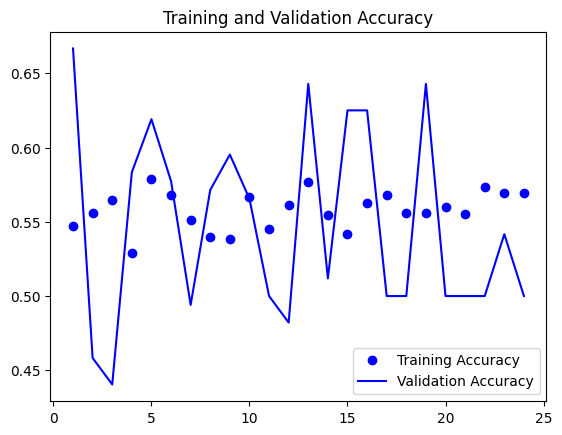

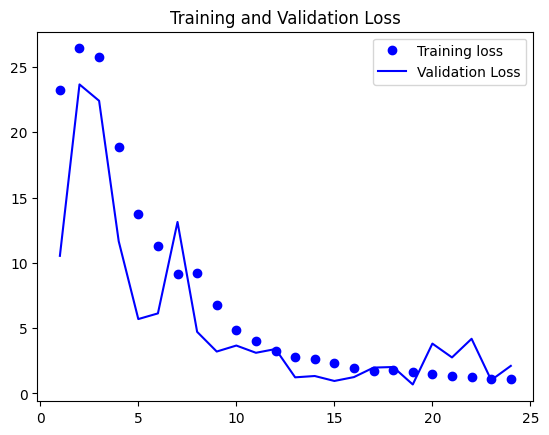

In [27]:
ModelB(l, w, train_generator, val_generator, test_generator)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 268, 478, 32)      896       
                                                                 
 batch_normalization_25 (Bat  (None, 268, 478, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 134, 239, 32)     0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 134, 239, 32)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 132, 237, 64)      18496     
                                                                 
 batch_normalization_26 (Bat  (None, 132, 237, 64)   

/tmp/ipykernel_28/4025117941.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60


2023-10-15 19:16:08.278097: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_25/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


170/170 [==============================] - 102s 580ms/step - loss: 13.2922 - accuracy: 0.5421 - val_loss: 3.4361 - val_accuracy: 0.5119
Epoch 2/60
170/170 [==============================] - 98s 575ms/step - loss: 13.7641 - accuracy: 0.5458 - val_loss: 25.1764 - val_accuracy: 0.5655
Epoch 3/60
170/170 [==============================] - 98s 574ms/step - loss: 13.5726 - accuracy: 0.5606 - val_loss: 7.7708 - val_accuracy: 0.5536
Epoch 4/60
170/170 [==============================] - 97s 570ms/step - loss: 11.5613 - accuracy: 0.5583 - val_loss: 13.7991 - val_accuracy: 0.5000
Epoch 5/60
170/170 [==============================] - 97s 569ms/step - loss: 11.2375 - accuracy: 0.5583 - val_loss: 8.1294 - val_accuracy: 0.6071
Epoch 6/60
170/170 [==============================] - 98s 574ms/step - loss: 9.7878 - accuracy: 0.5724 - val_loss: 6.3289 - val_accuracy: 0.6726
Epoch 6: early stopping


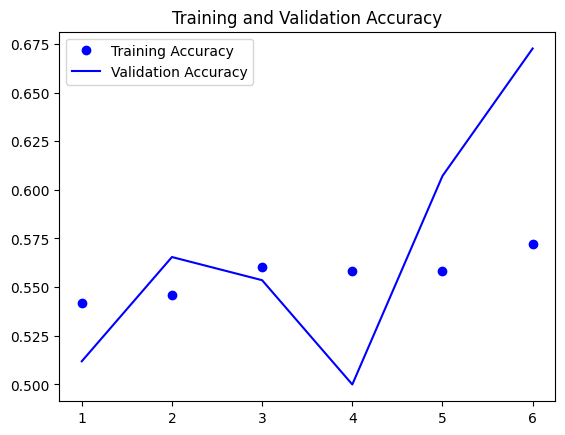

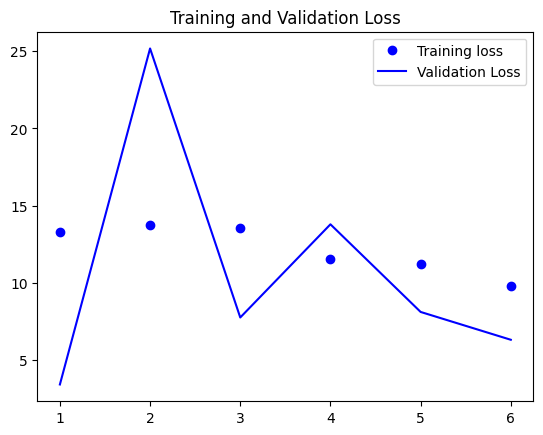

In [28]:
ModelC(l, w, train_generator, val_generator, test_generator)